In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV



### Assignment 4, Part 1: Data Exploration

- Read in bike_share_hour.csv as a pandas dataframe. The columns are described in the bike_share_readme.txt if you need more information about them.

- Look at the dataset, and convert the columns that are categorical to a pandas “category” type.
- Look for non-null values in the dataset.
- Do a descriptive analysis of the numeric columns.


In [2]:
bike = pd.read_csv('bike_share_hour.csv')

In [3]:
bike.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
print(bike.dtypes)

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


In [5]:
bike = bike.astype({
    'season': 'category',
    'yr': 'category',
    'mnth': 'category',
    'hr': 'category',
    'holiday': 'category',
    'weekday': 'category',
    'workingday': 'category',
    'weathersit': 'category'
})


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  category
 4   mnth        17379 non-null  category
 5   hr          17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [10]:
numeric = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
bike[numeric].describe()


,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Implement a bar plot of cnt versus season. Document which season has the most bike rides and which season has the least.
- Implement a bar chart for working day versus count. Document how bike rides are distributed across these two classes.
- Implement a bar chart for month versus count. Document which months have the most bike rides.


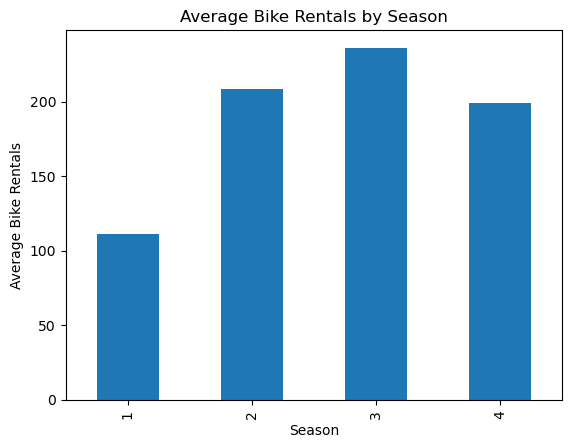

In [14]:
season_counts = bike.groupby('season')['cnt'].mean()

season_counts.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Season')
plt.show()

Fall has the most bike rentals

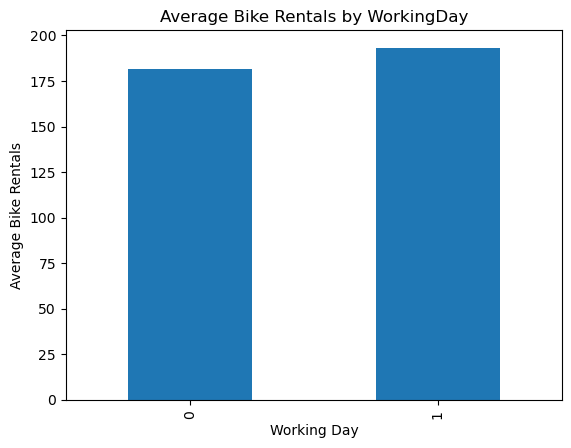

In [15]:
working_counts = bike.groupby('workingday')['cnt'].mean()

working_counts.plot(kind='bar')
plt.xlabel('Working Day')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by WorkingDay')
plt.show()

Working days have marginally more bike rentals

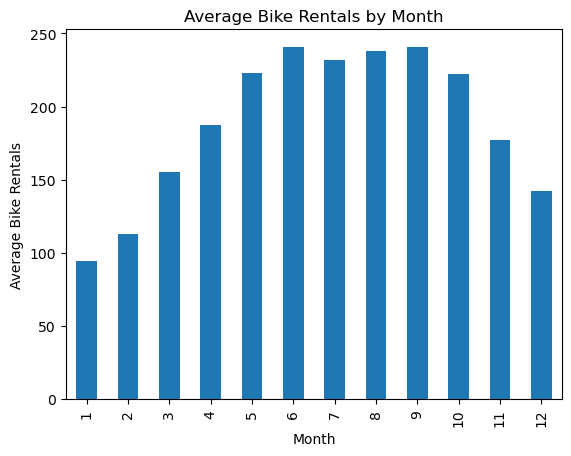

In [17]:
month_counts = bike.groupby('mnth')['cnt'].mean()

month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Month')
plt.show()

June and September have the most bike rentals

- Implement code to figure out which months belong to which seasons.
- Implement a bar plot of weathersit versus cnt. Document which weather situation has less bike rentals.


In [ ]:
month_to_season = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

bike['season_name'] = bike['mnth'].map(month_to_season)


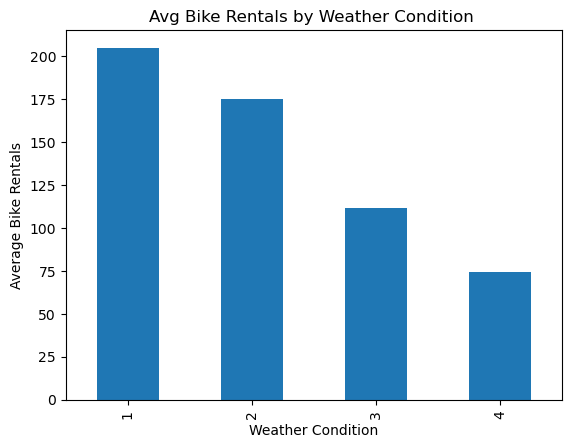

In [19]:
weather_counts = bike.groupby('weathersit')['cnt'].mean()

weather_counts.plot(kind='bar')
plt.xlabel('Weather Condition')
plt.ylabel('Average Bike Rentals')
plt.title('Avg Bike Rentals by Weather Condition ')
plt.show()

Clear with few clouds is the ideal time for bike rentals. Mist is second

- Implement a point plot of weathersit on the x-axis, count on the y-axis, and the season as the hue. Document how season and weathersit are related.
- Implement a bar plot of hour versus count. Are there any specific hours that are busier than others?
- Implement a bar plot of hour versus count on weekends and holidays (when workingday = 0). Does the hourly trend change on weekends?


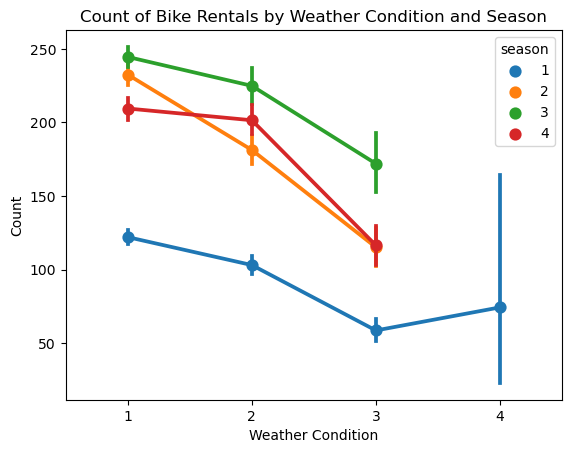

In [21]:
sns.pointplot(data=bike, x='weathersit', y='cnt', hue='season')

plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Count of Bike Rentals by Weather Condition and Season')

plt.show()

No matter what season is there is always a drop in the number of bike rentals with certain weather conditions. Rain, mist and snow are big deterents for bike rentals

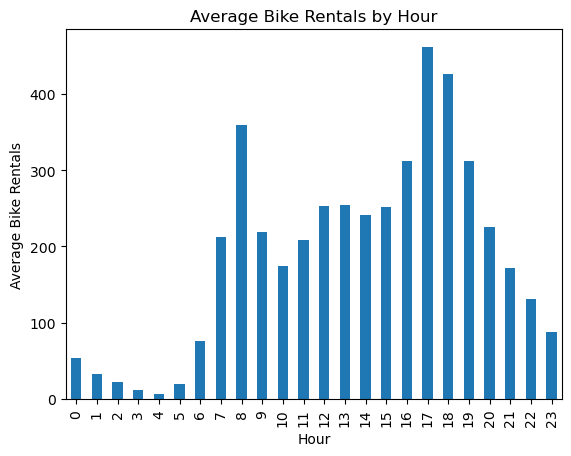

In [23]:
hourly_counts = bike.groupby('hr')['cnt'].mean()

hourly_counts.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Average Bike Rentals')
plt.title('Average Bike Rentals by Hour')
plt.show()

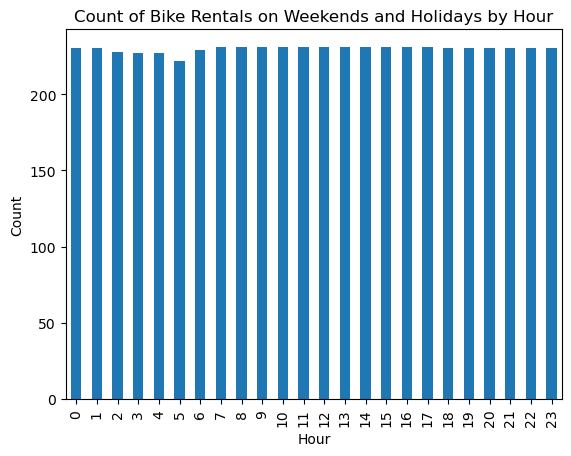

In [24]:
weekend_holiday_data = bike[bike['workingday'] == 0]

hourly_counts = weekend_holiday_data['hr'].value_counts()

hourly_counts = hourly_counts.sort_index()

hourly_counts.plot(kind='bar')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count of Bike Rentals on Weekends and Holidays by Hour')
plt.show()

On weekends and holidays theres not a lot of variation on the times when people are renting bikes. They are busy all day

### Assignment 4, Part 2: Data Preparation
- Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?

- Scale the numerical features using StandardScaler(), and replace the original columns in your dataframe.


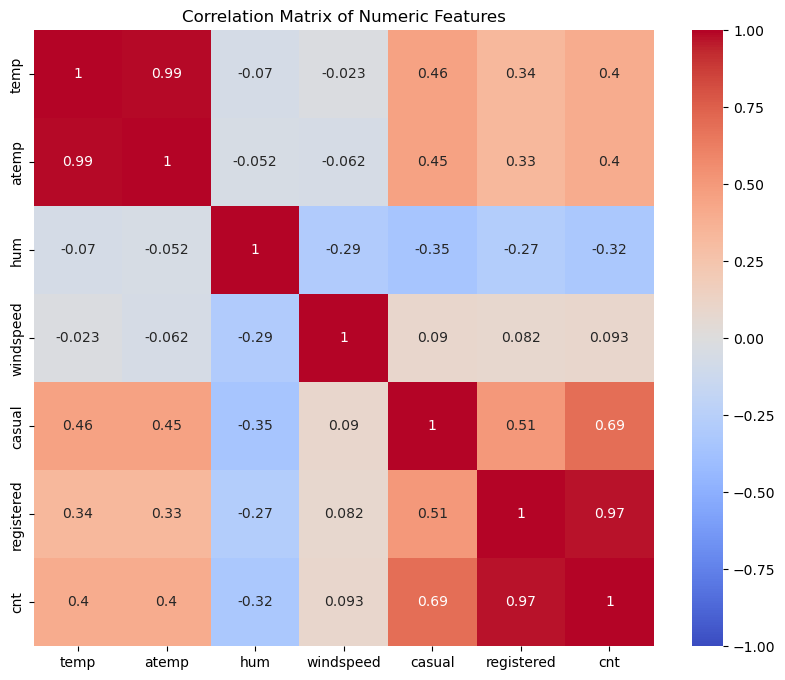

In [27]:
correlation_matrix = bike[numeric].corr()

# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

- Drop the following columns from your dataset: casual, registered, dteday, instant.
- Implement a histogram of the count column. What can be said based on the resulting distribution?
- Implement a train/test split with a test size of 33%.
- Implement a baseline linear regression algorithm. Use cross-validation to output r2 and mse. Calculate RMSE base on mse. Document your scores.


In [28]:
bike = bike.drop(['casual', 'registered', 'dteday', 'instant'], axis=1)


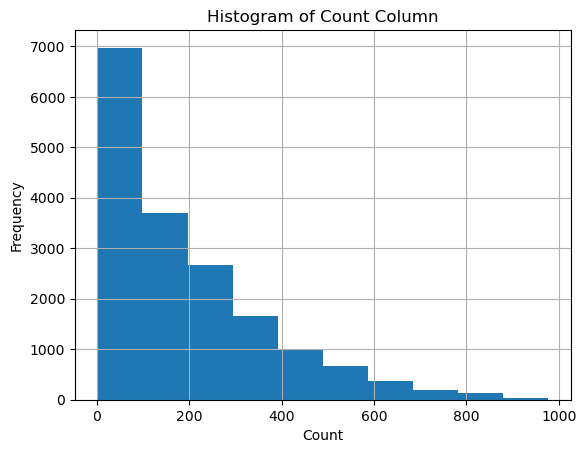

In [30]:
bike['cnt'].hist(bins=10) 

plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Count Column')

plt.show()

In [36]:
X = bike.drop(['cnt'], axis=1)
y = bike['cnt']

In [37]:
#create train and test set
train_data, test_data = train_test_split(bike, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [42]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)

mse_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse_scores)

rmse = np.sqrt(mean_mse)

print("R2 Score:", r2)
print("MSE Scores:", mse_scores)
print("Mean MSE:", mean_mse)
print("RMSE:", rmse)

R2 Score: 0.39139163128590015
MSE Scores: [10310.54722543 16367.20504729 13531.64741356 32707.12341993
 33600.43236681]
Mean MSE: 21303.391094605184
RMSE: 145.95681242958543


### Assignment 4, Part 3: Model Training (Hint: trained all of these with a for loop and added my results to a PrettyTable.)

- Create one-hot-encoded values for your categorical columns using get_dummies and add them to your source dataset.
- Drop the original categorical columns from your source dataset.
- Do a test/train split based on your new source dataset. Implement and fit a new linear model on your new training set.
- What are the new values for r2, mse, and rmse?


In [44]:
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

one_hot_encoded = pd.get_dummies(bike[categorical_columns], drop_first=True)

bike = bike.drop(categorical_columns, axis=1)

bike_encoded = pd.concat([bike, one_hot_encoded], axis=1)

# display the updated dataset
print(bike_encoded.head())

   temp   atemp   hum  windspeed  cnt  season_2  season_3  season_4  yr_1  \
0  0.24  0.2879  0.81        0.0   16         0         0         0     0   
1  0.22  0.2727  0.80        0.0   40         0         0         0     0   
2  0.22  0.2727  0.80        0.0   32         0         0         0     0   
3  0.24  0.2879  0.75        0.0   13         0         0         0     0   
4  0.24  0.2879  0.75        0.0    1         0         0         0     0   

   mnth_2  ...  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0       0  ...          0          0          0          0          0   
1       0  ...          0          0          0          0          0   
2       0  ...          0          0          0          0          0   
3       0  ...          0          0          0          0          0   
4       0  ...          0          0          0          0          0   

   weekday_6  workingday_1  weathersit_2  weathersit_3  weathersit_4  
0          1             0 

In [52]:
X = bike_encoded.drop(['cnt'], axis=1)
y = bike_encoded['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print("Linear Regression R2 Score:", r2)
print("Linear Regression MSE:", mse)
print("Linear Regression RMSE:", rmse)

Linear Regression R2 Score: 0.677897432628126
Linear Regression MSE: 10275.53904660433
Linear Regression RMSE: 101.36833354950811


- Implement and score a decision tree regressor with random_state=0.

- Implement and score a RandomForestRegressor with random_state=0 and n_esitmators=30.

- Implement and score an SGDRegressor with max_iter=1000 and tol=1e-3).


In [51]:
model = DecisionTreeRegressor(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

# print the results
print("Decision Tree R2 Score:", r2)
print("Decision Tree MSE:", mse)
print("Decision Tree RMSE:", rmse)

Decision Tree R2 Score: 0.8193845409207615
Decision Tree MSE: 5761.895092398884
Decision Tree RMSE: 75.90714783469923


In [56]:
model = RandomForestRegressor(random_state=0, n_estimators=30)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print("Randomn Forest R2 Score:", r2)
print("Random Forest MSE:", mse)
print("Random Forest RMSE:", rmse)

Randomn Forest R2 Score: 0.9069219300983625
Random Forest MSE: 2969.32542159041
Random Forest RMSE: 54.491516969069686


In [59]:
model = SGDRegressor(max_iter=1000, tol=1e-3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print("SGD Regressor R2 Score:", r2)
print("SGD Regressor MSE:", mse)
print("SGD Regressor RMSE:", rmse)

SGD Regressor R2 Score: 0.6755442972620567
SGD Regressor MSE: 10350.607477549416
SGD Regressor RMSE: 101.73793529234518


- Implement and score a Lasso Regressor with alpha=0.1.
- Implement and score an ElasticNet Regressor with random_state=0.


In [61]:
model = Lasso(alpha=0.1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

# print the results
print("Lasso R2 Score:", r2)
print("Lasso MSE:", mse)
print("Lasso RMSE:", rmse)

Lasso R2 Score: 0.6768973566512779
Lasso MSE: 10307.442920682457
Lasso RMSE: 101.5255776673172


In [64]:
model = ElasticNet(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print("Elastic Net R2 Score:", r2)
print("Elastic Net MSE:", mse)
print("Elastic Net RMSE:", rmse)

Elastic Net R2 Score: 0.16073924469677525
Elastic Net MSE: 26773.63527948695
Elastic Net RMSE: 163.62651154225267


- Implement and score a Ridge Regressor with alpha=0.5.
- Implement and score a BaggingRegressor.


In [66]:
model = Ridge(alpha=0.5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print("Ridge R2 Score:", r2)
print("Ridge Net MSE:", mse)
print("Ridge RMSE:", rmse)

Ridge R2 Score: 0.6779643247313805
Ridge Net MSE: 10273.40509149646
Ridge RMSE: 101.35780725477667


In [68]:
model = BaggingRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = mse ** 0.5

print("Bagging Regressor R2 Score:", r2)
print("Bagging Regressor MSE:", mse)
print("Bagging Regressor RMSE:", rmse)

Bagging Regressor R2 Score: 0.9013560832552971
Bagging Regressor MSE: 3146.884008067953
Bagging Regressor RMSE: 56.097094470818654


### Assignment 4, Part 4: Model Tuning
- Take the top three performing models and implement cross-validation on them.
Hint: They should be Decision Tree Regressor, RandomForestRegressor, and BaggingRegressor.


In [70]:
model = DecisionTreeRegressor(random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

mean_r2 = cv_scores.mean()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

# calculate MSE
mse = mean_squared_error(y, y_pred)

# calculate RMSE
rmse = mse ** 0.5

# print the results
print("Decision Tree Cross-Validated R2 Score:", mean_r2)
print("Decision Tree R2 Score (on full data):", r2)
print("Decision Tree MSE:", mse)
print("Decision Tree RMSE:", rmse)

Decision Tree Cross-Validated R2 Score: 0.542611218537331
Decision Tree R2 Score (on full data): 0.9999912550963932
Decision Tree MSE: 0.2877035502618102
Decision Tree RMSE: 0.536380042751229


In [71]:
model = RandomForestRegressor(random_state=0, n_estimators=30)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

mean_r2 = cv_scores.mean()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

mse = mean_squared_error(y, y_pred)

rmse = mse ** 0.5

print("Random Forest Cross-Validated R2 Score:", mean_r2)
print("Random Forest R2 Score (on full data):", r2)
print("Random Forest MSE:", mse)
print("Random Forest RMSE:", rmse)

Random Forest Cross-Validated R2 Score: 0.7398760048162897
Random Forest R2 Score (on full data): 0.9869161953998077
Random Forest MSE: 430.4515182383522
Random Forest RMSE: 20.747325568331746


In [72]:
model = BaggingRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

mean_r2 = cv_scores.mean()

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

mse = mean_squared_error(y, y_pred)

rmse = mse ** 0.5

print("Bagging Regressor Cross-Validated R2 Score:", mean_r2)
print("Bagging Regressor R2 Score (on full data):", r2)
print("Bagging Regressor MSE:", mse)
print("Bagging Regressor RMSE:", rmse)

Bagging Regressor Cross-Validated R2 Score: 0.726820825829219
Bagging Regressor R2 Score (on full data): 0.9832730770199386
Bagging Regressor MSE: 550.3085388570818
Bagging Regressor RMSE: 23.458655947370083


- Take your top performing model (mine was the RandomForestRegressor) and do a randomize search cv with 20 iterations and three folds.


I found it is best to set your n_jobs = (# of cpu’s you have – 1). This took about 10 minutes on my MacBook with 4 CPUs and 8 GB of memory.
Your param distributions should include the following:

Bootstrap: true, false
Max_depth: 10-110, number of bins 11
Max_features: auto, sqrt
Min_samples_split: 2,5,10
Min_samples_leaf: 1,2,4
N_estimators: 200 – 2000, number of bins 10
- Take your best_estimator_ and see how it compares by doing cross_vals for r2, mse, and calculating rmse.
- Finally, run predictions on your test set with this model, and see how your r2 score and RMSE look.


In [74]:
model = RandomForestRegressor(random_state=0)

param_distributions = {
    'bootstrap': [True, False],
    'max_depth': np.linspace(10, 110, 11),
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': np.linspace(200, 2000, 10, dtype=int)
}

random_search = RandomizedSearchCV(model, param_distributions, n_iter=20, cv=3, random_state=0, n_jobs=3)
random_search.fit(X, y)

best_model = random_search.best_estimator_

cv_r2 = cross_val_score(best_model, X, y, cv=3, scoring='r2')
cv_mse = -cross_val_score(best_model, X, y, cv=3, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(cv_mse)

best_model.fit(X, y)

y_pred = best_model.predict(X)

r2 = r2_score(y, y_pred)

mse = mean_squared_error(y, y_pred)

rmse = np.sqrt(mse)

print("Best Model:", best_model)
print("Cross-Validation R2 Scores:", cv_r2)
print("Cross-Validation MSE Scores:", cv_mse)
print("Cross-Validation RMSE Scores:", cv_rmse)
print("R2 Score (on full data):", r2)
print("MSE:", mse)
print("RMSE:", rmse)

Best Model: RandomForestRegressor(max_depth=110.0, min_samples_split=10, n_estimators=1800,
                      random_state=0)
Cross-Validation R2 Scores: [0.72235207 0.77644219 0.83752597]
Cross-Validation MSE Scores: [4992.29522323 5578.81115203 7828.10574853]
Cross-Validation RMSE Scores: [70.65617612 74.69143962 88.47658305]
R2 Score (on full data): 0.9673618102814575
MSE: 1073.7823397860511
RMSE: 32.768618216001286
